# 1) Teorema do Limite Central

# I


Crie uma amostra de tamanho 1000 a partir da distribuiço exponencial, usando λ = 0:2. Em seguida, crie um histograma com os elementos dessa amostra.

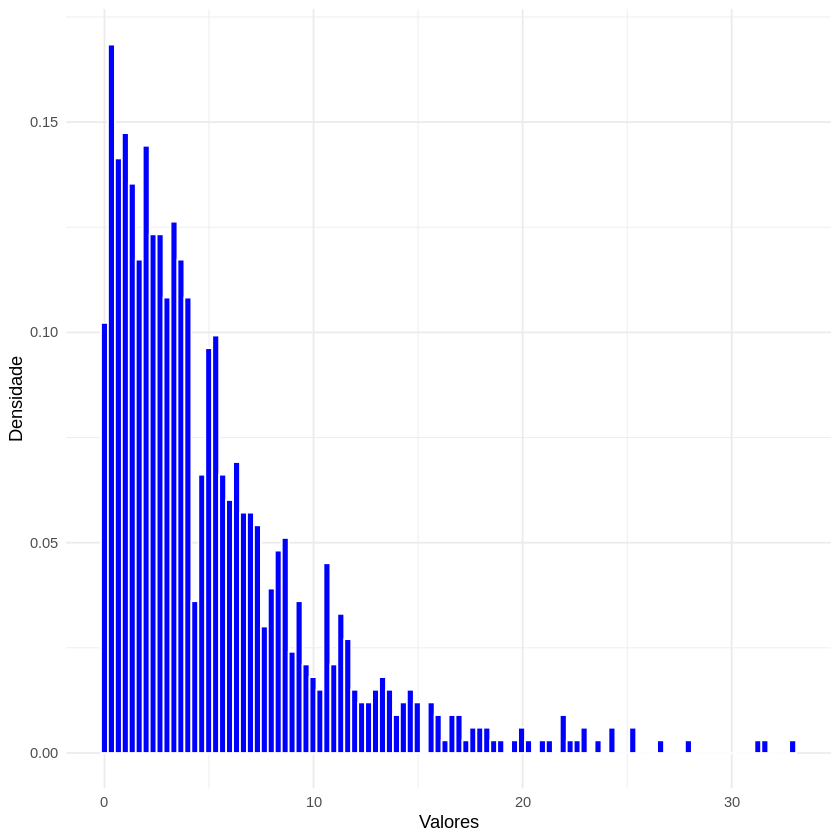

In [41]:
library(tidyverse)

set.seed(1)

lambda <- 0.2
n <- 1000

sample <- rexp(n, rate = lambda)

data <- as_tibble(sample)

ggplot(data, aes(x = value, after_stat(density))) +
  geom_histogram(bins = 100, fill = "blue", color = "white") +
  labs(x = 'Valores', y = 'Densidade') +
  theme_minimal()

Essa parte do código realiza as simulações de uma distribuição exponencial com o parâmetro de taxa lambda = 0,2 e tamanho de amostra n = 1000. É utilizado a função rexp para gerar amostras aleatórias seguindo o valor de lambda e a quantidade dada pelo valor de n.

Esse resultado é colocado em uma variável sample, que posteriormente é transformada em uma tabela com a função as_tibble().

Após isso, é criado um histograma utilizando a biblioteca ggplot2, sendo o x o valor que está na tabela sample, e o y a densidade do valor.

É utilizado alguns parâmetros como bins, fill e color, que servem para ditar a quantidade de linhas de gráfico, a cor da linha e a cor do contorno da linha.

A função labs é utilizada para dar nome ao eixo x e y; sendo nesse caso, o eixo x é chamado de Valores e o eixo y de Densidade.

Por último, a função theme_minimal é para colocar um tema para esse gráfico.

# II


Crie um histograma da distribuição amostral para a variável x, a média
amostral (sampling distribution of the mean). Construa esse histograma
usando os dados resultantes das 1000 simulações.

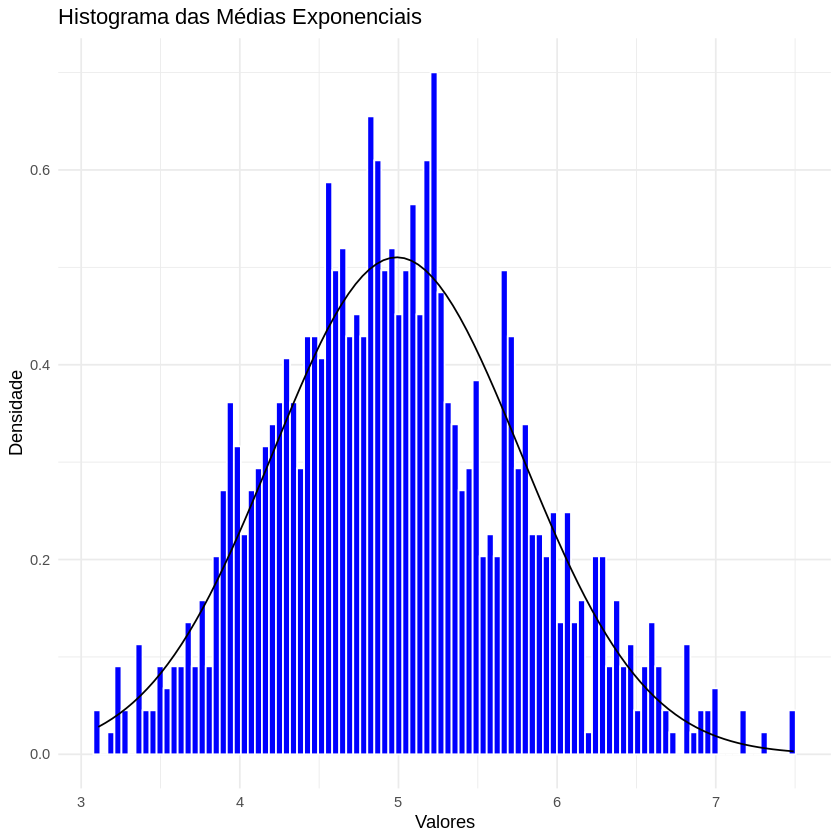

In [8]:
set.seed(1)

lambda <- 0.2
n <- 40
simulation <- 1000

means <- replicate(simulation, mean(rexp(n, rate = lambda)))


means <- as_tibble(means)
hist_plot <- ggplot(means, aes(x = value)) +
  geom_histogram(aes(y = after_stat(density)), bins = 100, fill = "blue", color = "white") +
  stat_function(fun = dnorm, args = list(mean=mean(means$value), sd=sd(means$value))) +
  labs(x = "Valores", y = "Densidade") +
  ggtitle("Histograma das Médias Exponenciais") +
  theme_minimal()

print(hist_plot)

Esse código representa um histograma da distribuição amostral da média amostral.

Nesse caso, foi utilizado a função replicate para ser feito 1000 vezes a geração de n medias amostrais. Em seguida, ele cria um histograma das médias das amostras e sobrepostas a esse gráfico, uma curva de densidade normal estimada para as médias. Com isso, demostrando que esse gráfico segue aproximadamente uma distribuição normal.

# III

Calcule a média e variância aproximadas para a variável x e
use o TLC para obter aproximações para a média e a variância da
população subjacente. Os valores que você obteve são próximos aos
valores teóricos? Explique.

In [9]:
print(mean(means$value))
print(var(means$value))

print(1/lambda)
print((1/lambda) ^2/n)

[1] 4.990025
[1] 0.6111165
[1] 5
[1] 0.625


Foi utilizado a função mean() e var() para fazer o calculo da media e a variância. Após isso, foi feito o calculo utilizando TLC para se obter as mesmas medias, e é possível perceber que os valores encontrados foram próximos ao teórico.

# 2) Distribuição amostral da média amostral

# I

Esboce um gráfico (histograma) da distribuição da população com
relação à característica quantidade de batatas.


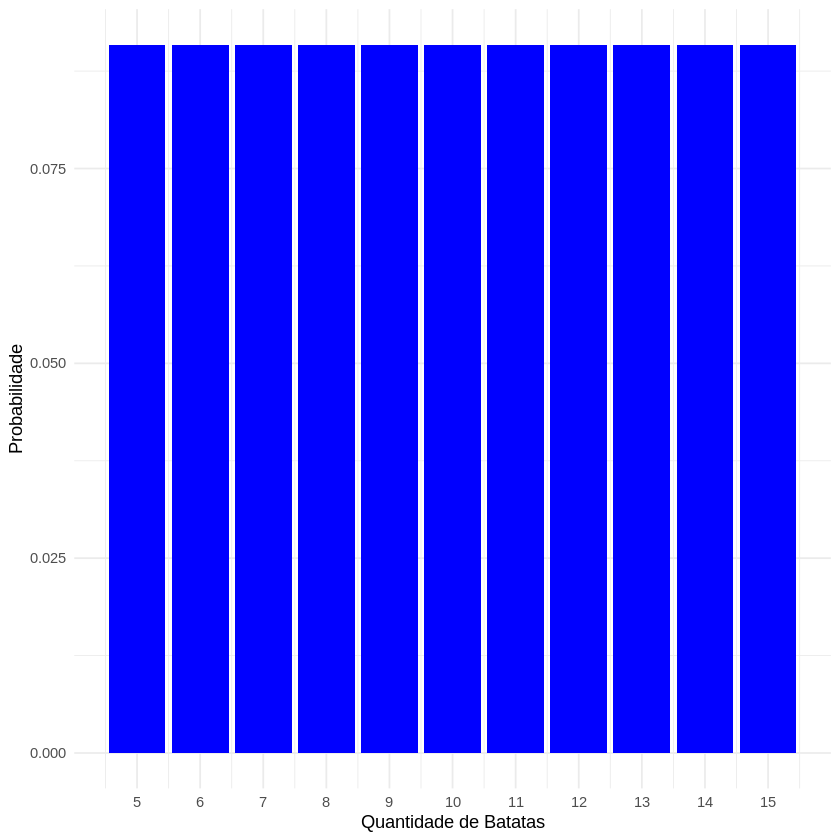

In [10]:
quantidades <- 5:15
probabilidades <- 1/11
df <- data.frame(Quantidade_de_Batatas = quantidades, Probabilidade = probabilidades)

ggplot(df, aes(x = Quantidade_de_Batatas, y = probabilidades)) +
  geom_bar(stat = "identity", width = 0.9, fill = "blue") +
  scale_x_continuous(breaks = seq(5, 15, by = 1)) +
  labs(x = "Quantidade de Batatas", y = "Probabilidade") +
  theme_minimal()

Foi criado uma variável com nome de quantidade de recebe um vector com os valores no intervalo de 5 á 15. Após isso, foi criado uma variável com o valor de 1/11 que é a porcentagem de ter em um saco cada valor da variável quantidade.

Foi criado um gráfico representando o que foi dito acima, pode perceber que todos os valores da variável x tem o mesmo y, já que a porcentagem é igual para todos.

stat = "identity" significa que você está fornecendo diretamente os valores das barras

scale_x_continuous serve para dar uma diferente forma de escala para o eixo x, nesse caso terá como limites o 5 e o 15 e será dividido em 1.

# II

Calcular a média, variância e desvio padrão da distribuição da população.

In [12]:
a <- 5
b <- 15

media_populacao <- (5 + 15)/2
n <- b - a + 1
variancia_populacao <- (n^2 - 1)/12

desvio_padrao_populacao <- sqrt(variancia_populacao)

print(media_populacao)
print(variancia_populacao)
print(desvio_padrao_populacao)

[1] 10
[1] 10
[1] 3.162278


Foi calculado a media, variância e desvio padrão seguindo as formulas utilizadas para o calculo em uma distribuição discreta e uniforme.

# III

Considere que o plano amostral utilizado é uma amostragem aleatória simples feita com substituição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e calcular a média de cada amostra. Feito isso, para cada amostra, voce vai ter calculado uma estatística pontual (point statistic) da variável x. Se voce zer isso para todas as possíveis amostras aleatórias de tamanho 2, a distribuição de todas as estatísticas pontuais resultantes é denominada distribuição amostral da média (sampling distribution of the sample mean) para n = 2. Para a maioria dos casos práticos, dada uma população, nao é possível gerar todas as possíveis amostras 5 (de determinado tamanho) dessa população. Entretanto, para este caso particular, isso é possível, porque a população é finita e pequena. Sendo assim, encontre essa distribuição aplicando os passos a seguir.

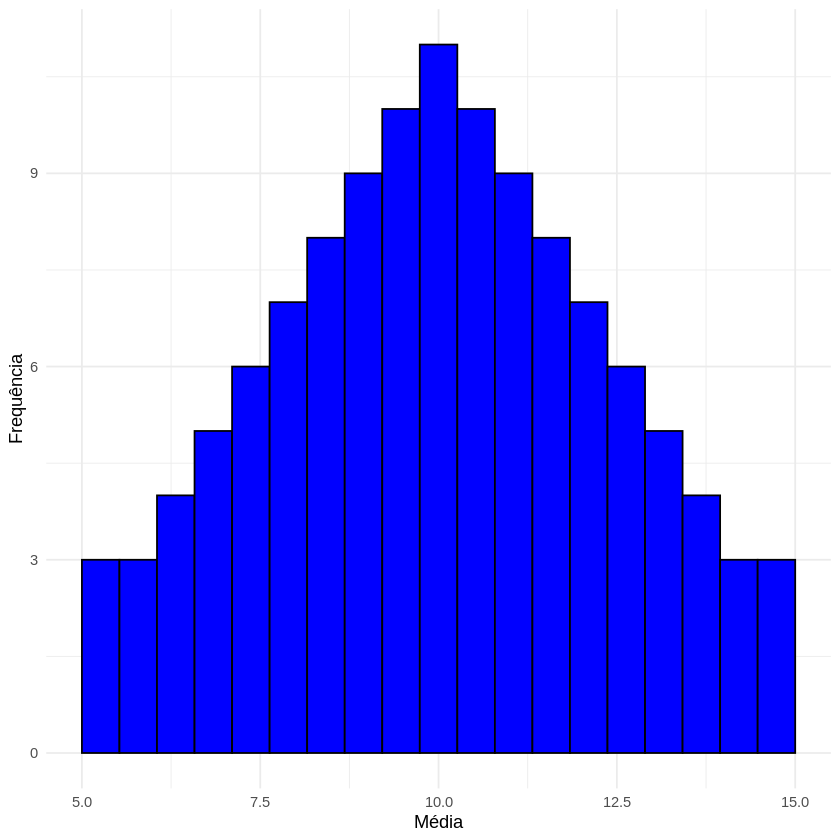

In [3]:
library(gtools)

a1 <- 5:15
combinacoes <- permutations(11, 2, a1, repeats.allowed = TRUE)
a <- NULL
a <- as_tibble(a)

for (i in 1:nrow(combinacoes)) {
  a[i, 1] <- mean(combinacoes[i, ])
}
a <- rename(a, value = ...1)

ggplot(a, aes(x = value)) +
  geom_histogram(bins = 20, fill = "blue", color = "black") +
  labs(x = "Média", y = "Frequência") +
  theme_minimal()


Foi utilizada a função permutations da biblioteca gtools para se feito combinações de todos os pares possíveis, podendo repetição.
Após isso, foi colocado em uma tabela a, os valores da media desses dois pares e então feito um gráfico de histograma para verificar sua distribuição.

# IV

Encontre a média, a variância e o desvio padrão da
distribuição amostral da média amostral para n = 2

In [20]:
media <- mean(a$value)
variancia <- var(a$value)
desvio_padrao <- sqrt(var(a$value))

print(media)
print(variancia)
print(desvio_padrao)

[1] 10
[1] 5.041667
[1] 2.245366


Foi calculada a media, variancia e desvio padrão da distribuição amostral feita na última questão.

# V

Desvio padrão e a média da distribuição amostral da média para
n = 2. Como forma de validação, você deve encontrar os mesmos
valores encontrados no item (iv).

In [22]:
media_2 <- (min(a) + max(a))/2
n <- max(a) - min(a) + 1
variancia_populacao <- ((n^2 - 1)/12)/2

print(media_2)
print(variancia_populacao)

[1] 10
[1] 5


Foi calculada agora as medias e variância seguindo a teoria já vista no exercício (II), com isso foi possível verificar que os valores foram iguais. Já que esses cálculos são adequados quando a variável em questão segue uma distribuição uniforme discreta, onde todos os valores entre o mínimo e o máximo têm a mesma probabilidade de ocorrência.

#VI

Suponha, por um momento, que você não conhece a distribuição de
probabilidades da população e que deseja estimar a média da população
a partir de uma amostra de tamanho 2 tomada aleatoriamente dessa
população. Qual estatística você calcularia sobre essa amostra para
estimar a média da população? Você acha que essa estatística seria um
bom estimador da população? Que outra estatística poderia ser um
melhor estimador? Por quê?

Eu utilizaria a média amostral para entender mais sobre essa amostra. Não seria um bom estimador, já que com apenas 2 valores não é possível ter nenhuma comprovação. Seria necessário aumentar a amostra para se ter um maior
conhecimento sobre essa população, para assim ser possível estimar as suas características com exatidão.

# VII

n = 9; Fazer os mesmos passos da (iii) e (iv)

A) Para gerar a distribuição amostral teórica, teríamos que gerar todas
as possíveis amostras de tamanho n = 9. Quantas amostras
possíveis de tamanho n = 9 existem? Essa tarefa (gerar a distribuição amostral teórica neste caso) é factível de ser feita manualmente,
ou mesmo usando um computador?

In [ ]:
permutations(11, 9, a1, repeats.allowed = TRUE)

Não seria possível gerar essa quantidade de amostras, como é uma quantidade gigantesca de possibilidades, é necessário uma quantidade maior de memória para ser capaz de rodar.

B) Crie um histograma da distribuição amostral empírica (que é uma
aproximação da distribuição amostral teórica). Dica: gere uma
quantidade grande de amostras para obter uma aproximação adequada.

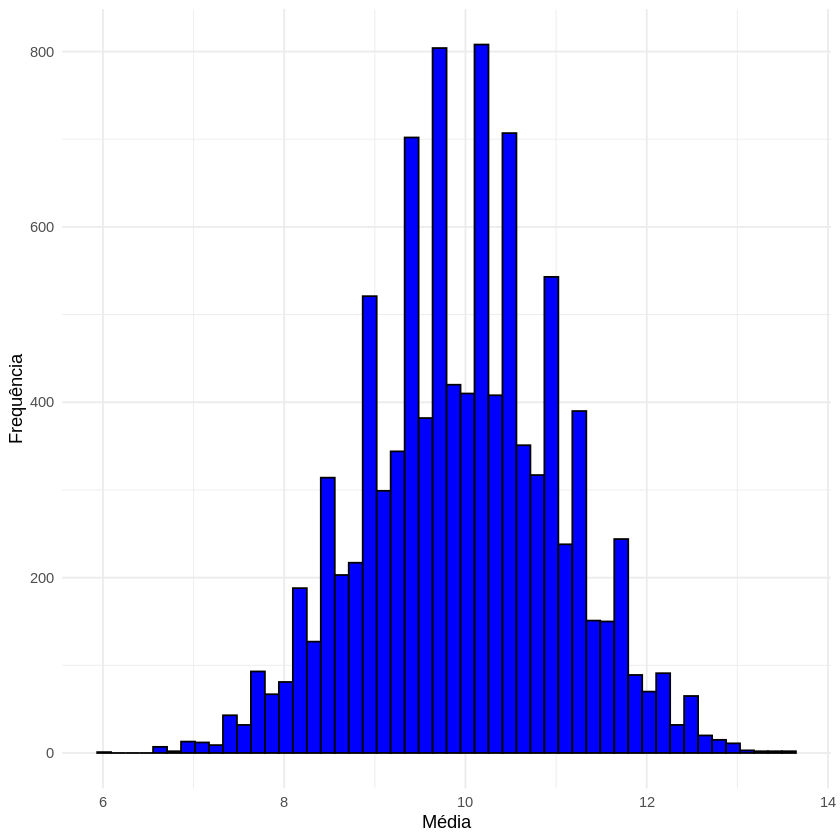

In [6]:
library(tidyverse)
a1 <- 5:15
n <- 9
num_amostras <- 10000
a <- NULL

for(i in 1:num_amostras) {
  sample_mean <- mean(sample(a1, n, replace = TRUE))
  a <- rbind(a, data.frame(value = sample_mean))
}

ggplot(a, aes(x = value)) +
  geom_histogram(bins = 50, fill = "blue", color = "black") +
  labs(x = "Média", y = "Frequência") +
  theme_minimal()

Nesse caso, foi preciso colocar um limite de amostras para fazer com que fosse possível o computador rodasse essa distribuição amostral.

Foi feito um looping de tamanho igual a variável num_amostras, que gera amostras com 9 valores e calcula a média dessas amostras e coloca em uma variável chamada de sample_mean. E esse valor é adicionado á uma tabela chamada de a, que contém todas as 10000 médias.

Após isso, foi criado um histograma para melhor análise da distribuição.

# 3) Distribuição amostral da diferença de médias

# I

produza um histograma que aproxima a distribuição amostral de Md. Em seguida, crie o histograma solicitado com os 10000 valores produzidos.


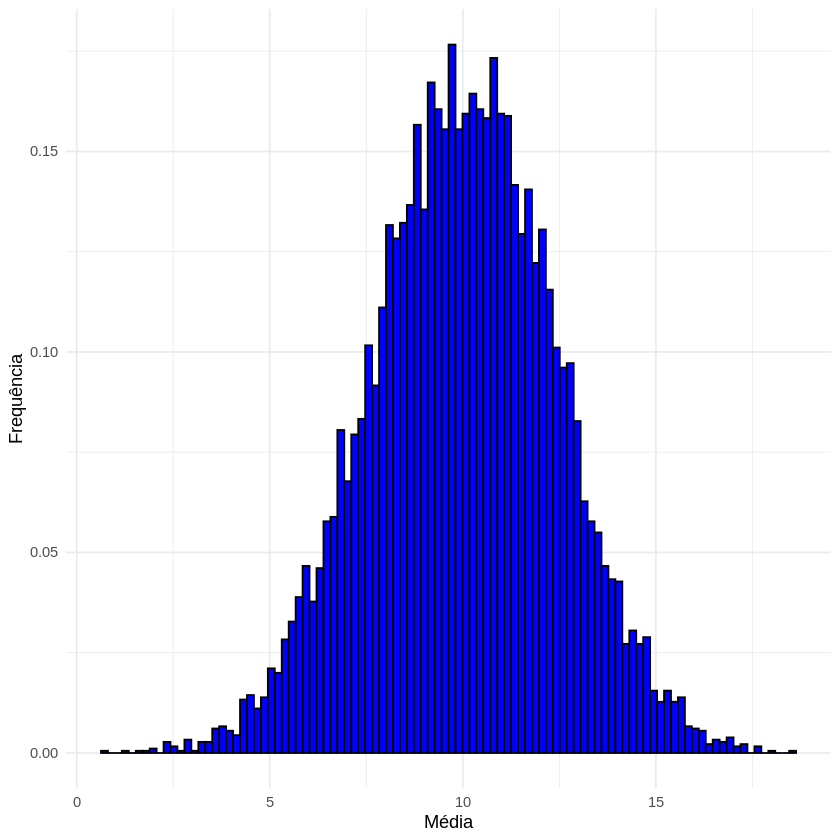

In [7]:
amostra <- rnorm(10000, 10, 2.35)
amostra <- as_tibble(amostra)

ggplot(amostra, aes(x = value, after_stat(density))) +
  geom_histogram(bins = 100, fill = "blue", color = "black") +
  labs(x = "Média", y = "Frequência") +
  theme_minimal()

A diferença das médias e do desvio padrão são de 10 e 2.35 respectivamente. Com isso foi criada uma amostra normal com 10000 valores que seguem o fato de ser uma amostra com média 10 e desvio padrão 2.35.

Foi criado um histograma para representar essa distribuição amostral.

# II

Usando a aproximação da distribuição amostral de Md obtida no item
anterior, compute aproximações para a média e o desvio padrão dessa estatística. Os valores que você obteve são próximos aos fornecidos
acima?

In [8]:
mean(amostra$value)
sd(amostra$value)

[1] 10.01376

[1] 2.377086

A semelhança entre os resultados observados na prática e os valores teoricamente esperados ocorre devido ao Teorema Central do Limite (TCL), que permite que as médias das amostras se aproximem da distribuição normal com os parâmetros teóricos esperados. À medida que o número de repetições aumenta, essa aproximação se torna mais precisa.

# III

Se um experimento com o medicamento para a memória descrito for realizado, qual é a probabilidade de a média do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [9]:
escores <- (15 - mean(amostra$value))/sd(amostra$value)

probabilidade <-  1 - pnorm(escores)

print(probabilidade)

[1] 0.01796912


Primeiro foi necessário calcular o escore, utilizando a formula (X - μ)/σ.

Substituindo pelos nossos valores, (15 - 10.0137641259963)/2.37708582845586

Com isso, foi possível calcular a probabilidade que é 1 - a função de distribuição cumulativa (CDF) da distribuição normal padrão.

Isso resulta na probabilidade de encontrar um valor maior do que os escores padronizados na distribuição normal padrão.

# 4) Intervalo de confiança para média populacional

# I

Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St.

In [11]:
pesquisa <-read.csv("/content/SchroederEpley2015data.txt")

pesquisa_por_classe<- pesquisa %>% group_by(CONDITION) %>% summarise(tamanho = n(),
                                               media = mean(Intellect_Rating))

Foi importado os dados que serão utilizados nas consultas e colocado em uma variável chamada de pesquisa.

Após isso, foi utilizado uma função chamada de group_by que serva para agrupar os dados de acordo com o atributo passado de argumento, nesse caso foi a CONDITION, e foi utilizado a função summarise para pegar esses valores e descobrir o tamanho, e media de cada condição, nesse caso sendo a pessoa que fala na entrevista ou que escreve.

# II

Construa um boxplot para apresentar gráficamente as duas amostras.

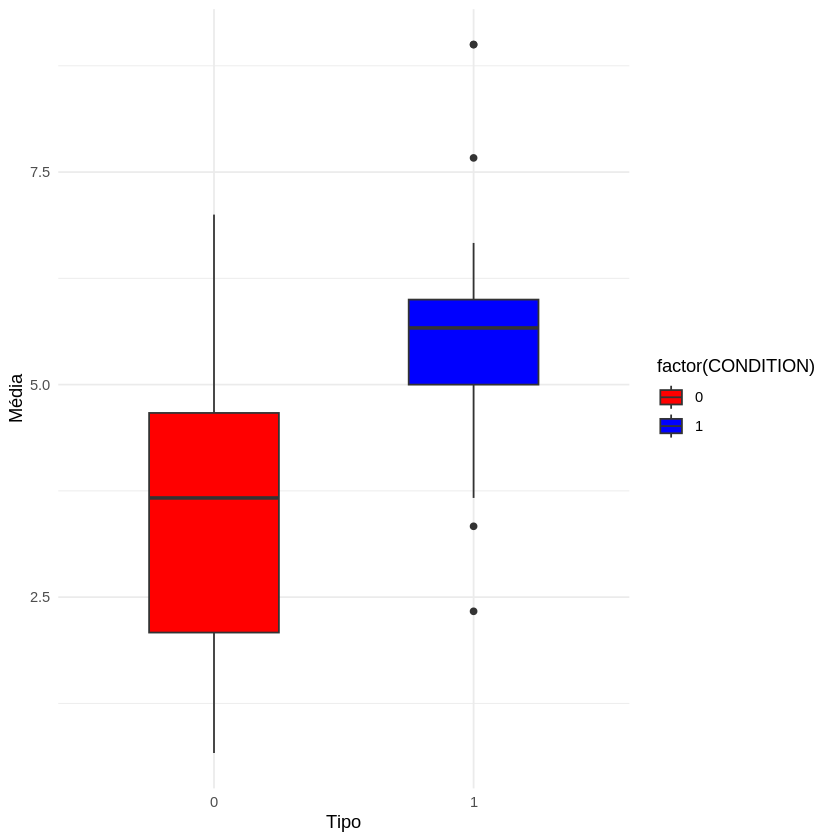

In [15]:
ggplot(pesquisa, aes(x = factor(CONDITION), y = Intellect_Rating, fill = factor(CONDITION))) +
  geom_boxplot(width = 0.5) +
  labs(x = 'Tipo', y = 'Média') +
  scale_fill_manual(values = c("0" = "red", "1" = "blue")) +
  theme_minimal()

Foi criado um gráfico boxplot para representar as duas amostras e foi transformada o atributo CONDITION para um tipo factor, com o objetivo de trabalhar com valores categóricos.

na função geom_boxplot tem o parâmetro width, que serve para falar a largura da "caixa"

Também foi adicionado uma função scale_fill_manual que serve para adicionar coisas para uma variável categórica, nesse caso foi adicionar a cor vermelha para o CONDITION = 0 e azul para CONDITION = 1.

# III

Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente uma análise do resultado obtido.

In [22]:
P2 <- pesquisa %>% filter(CONDITION == 0)
P1 <- pesquisa %>% filter(CONDITION == 1)

shapiro.test(P1$Intellect_Rating)
shapiro.test(P2$Intellect_Rating)


	Shapiro-Wilk normality test

data:  P1$Intellect_Rating
W = 0.93504, p-value = 0.1737



	Shapiro-Wilk normality test

data:  P2$Intellect_Rating
W = 0.95124, p-value = 0.4448


Foi feito uma filtragem na tabela pesquisa, onde foi adicionado na variável P2 todas as pessoas que pertencem a condição 0 e na P1 todas que pertencem a condição 1.

Após isso, foi feito o teste de normalidade, é utilizado a função shapiro.test da biblioteca stats

Caso o seu p-value seja maior que 0.05, então indica que o dado pode seguir a distribuição normal, nesse caso, as duas amostras têm o seu p-value maior que 0.05.

# IV

Construa um intervalo de confiança para a média de avaliações produzidas
por duas populações distintas, P1 e P2, descritas abaixo.
1.   P1: todos os recrutadores que ouvem os áudios
2.   P2: todos os recrutadores que leem os transcritos

Note que a resposta a este item devem ser dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%.

In [42]:
confidence_interval <- function(vetor, interval) {
  x_bar = mean(vetor)
  s = sd(vetor)
  desvp_bar = s / sqrt(length(vetor))
  z_score <- abs(qnorm((1 - interval)/2))
  error <- desvp_bar * z_score
  result <- c("limite_inferior" = x_bar - error, "limite_superior" = x_bar + error)
  return(result)
}

confidence_interval(P1$Intellect_Rating, 0.99)
confidence_interval(P2$Intellect_Rating, 0.99)

limite_inferior limite_superior 
       4.730698        6.539143

limite_inferior limite_superior 
       2.487717        4.808579

Foi criado uma função que recebe dois parâmetros, um vetor com os valores para ser feito um intervalo de confiança e o nível de confiança utilizado. Nesse caso, será feito com 99%. É feito da seguinte forma:

1.   Calculada a média desse vetor
2.   Calculado o desvio padrão da amostra.
3.   Calculado o desvio padrão da media da amostra, que é feito através da seguinte fórmula: s / sqrt(length(n)); nesse caso o N é conseguido pela função length
4.   Calcular o z_score, é utilizado o qnorm para encontrar o valor que corresponde a probabilidade de (1 - o intervalo de confiança)/2; e dentro disso tudo é utilizado o abs para garantir que o número será positivo
5. Calcular o erro, que é desvp_bar * z_score
6. Com isso é só somar e diminuir a média ao erro que será encontrado o limite superior e inferior desse intervalo de confiança.




# V

Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta.

Com base nos intervalos de confiança obtidos anteriormente, podemos observar que os resultados não são conclusivos o suficiente para validar plenamente a conclusão dos autores em Schroeder and Epley (2015). A sobreposição significativa nos intervalos de confiança sugere que as diferenças entre a maneira como uma pessoa fala e suas palavras escritas podem não ser tão distintas como inicialmente sugerido.

Seria necessário realizar análises estatísticas adicionais e talvez um estudo mais abrangente para obter uma compreensão mais sólida e conclusiva dessa questão.


# 5) Intervalo de confiança para média populacional

# I


Usando a distribuição t de Student, calcule um intervalo de confiança no nível de 95% para a altura média dos estudantes da universidade.

In [43]:
library(MASS)

survey_2 <- na.omit(survey$Height)

media_height <- mean(survey_2)
desvio_padrao_height <- sd(survey_2)
n <- length(survey_2)
df <- n - 1
alpha <- 1 - 0.95
t_score <- qt(alpha/2, df)
erro_padrao <- abs(t_score * desvio_padrao_height/sqrt(n))
result <- c("limite_inferior" = media_height - erro_padrao, "limite_superior" = media_height + erro_padrao)
print(result)

[1] 208
limite_inferior limite_superior 
       171.0380        173.7237 


Foi preciso adicionar a biblioteca MASS para conseguir a base de dados conhecida como survey.
Foram retiradas todas linhas que contém alturas não definidas nesse dataframe.
Após isso, foi calculada a média, desvio padrão, tamanho da amostra, grau de liberdade e o nível de significância.

Agora é calculado o t_score, com a função qt que recebe como parâmertros o alpha/2 e o n-1, esse valor é correspondente ao valor crítico da distribuição.

Então, é calculado o erro_padrão, a partir do t_score * desvio_padrao/sqrt(n) e utilizando o abs

Após isso, a media - erro = limite inferior; media + erro = limite superior



# II

Construa outro intervalo de confiança, desta vez usando o z-score (em
vez do t-score que você usou anteriormente).

In [32]:
confidence_interval <- function(vector, interval) {
  x_bar = mean(vector)
  s = sd(vector)
  desvp_bar = s / sqrt(length(vector))
  z_score <- abs(qnorm((1 - interval)/2))
  error <- desvp_bar * z_score
  result <- c("limite_inferior" = x_bar - error, "limite_superior" = x_bar + error)
  return(result)
}

confidence_interval(survey_2, 0.95)

limite_inferior limite_superior 
       171.0458        173.7159

Agora foi utilizado o mesmo código já construido anteriormente na questão 4(IV) só mudando o intervalo de confiança para 95%.

# III

Apresente uma análise comparativa dos dois intervalos de confiança obtidos.

Neste caso, nao há nenhuma mudança de valor significativo, então é possível utilizar as duas formas de medição, mas quando se tem uma amostra menor é recomendado a utilização do t-score

# 6) Intervalo de confiança para proporção populacional

# I


Primeiramente, se certifique de que existem pelo menos 10 estudantes
destros e pelo menos 10 estudantes canhotos, para que você possa
realizar a construção do intervalo de confiança de forma satisfatória.

In [34]:
survey_W<- na.omit(as.character(survey$W.Hnd))

survey_W<- as_tibble(survey_W) %>% group_by(value) %>% summarise(pessoa = n())

print(survey_W)

# A tibble: 2 × 2
  value pessoa
  <chr>  <int>
1 Left      18
2 Right    218


Foi transformado a variável W.Hnd em um tipo character e após isso retirado todos os valores NA.

Após isso, foi feito uma operação, já utilizado anteriormente, para entender a quantidade de jogadores canhotos e destros dessa base de dados.

# II

Produza o intervalo de confiança solicitado, usando o nível de confiança
90%. Junto com o resultado, forneça também uma análise.

In [36]:
n_canhotos <- survey_W$pessoa[1]
n_destros <- survey_W$pessoa[2]

proporcao_canhotos <- n_canhotos/(n_canhotos + n_destros)

confianca <- 0.90
alpha <- 1 - confianca
df <- n - 1
z_score <- qt(alpha/2, df)
erro_padrao <- sqrt((proporcao_canhotos * (1 - proporcao_canhotos)) / (n_canhotos + n_destros))
limite_inferior <- proporcao_canhotos - z_score * erro_padrao
limite_superior <- proporcao_canhotos + z_score * erro_padrao

result <- c("limite inferior" = limite_inferior, "limite superior" = limite_superior)

cat("A proporção de canhotos na amostra é:", proporcao_canhotos, "\n")
print(result)

A proporção de canhotos na amostra é: 0.07627119 
limite inferior limite superior 
     0.10481831      0.04772406 


Com todos esses calculos, foi possivel chegar a seguinte conclusão, que um pouco mais de 7.6% dos alunos são canhotos e que quando nível de confiança está em 90%, a proporção dos alunos seria entre 4.77% até 10.48%

# III

Produza o intervalo de confiança solicitado, usando o nível de confiança 95%. Junto com o resultado, forneça também uma análise e compare com o resultado obtido no item anterior.

In [37]:
n_canhotos <- survey_W$pessoa[1]
n_destros <- survey_W$pessoa[2]

proporcao_canhotos <- n_canhotos/(n_canhotos + n_destros)

confianca <- 0.95
alpha <- 1 - confianca
df <- n - 1
z_score <- qt(alpha/2, df)

erro_padrao <- sqrt((proporcao_canhotos * (1 - proporcao_canhotos)) / (n_canhotos + n_destros))

limite_inferior <- proporcao_canhotos - z_score * erro_padrao
limite_superior <- proporcao_canhotos + z_score * erro_padrao

result <- c("limite inferior" = limite_inferior, "limite superior" = limite_superior)

cat("A proporção de canhotos na amostra é:", proporcao_canhotos, "\n")
print(result)

A proporção de canhotos na amostra é: 0.07627119 
limite inferior limite superior 
      0.1103339       0.0422085 


Com o aumento do nível de confiança para 95%, foi observado que a proporção dos canhotos aumentou para abranger um nível maior.

Agora é 4.22% até 11.03%

# IV

Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [48]:
survey_Sex<- na.omit(as.character(survey$Sex))

survey_Sex<- as_tibble(survey_Sex) %>% group_by(value) %>% summarise(pessoa = n())

n_mulheres <- survey_Sex$pessoa[1]
n_homens <- survey_Sex$pessoa[2]

proporcao_mulheres <- n_mulheres/(n_mulheres + n_homens)

confianca <- 0.90
alpha <- 1 - confianca
df <- n - 1
print(n_mulheres + n_homens)
z_score <- qt(alpha/2, df)
erro_padrao <- sqrt((proporcao_mulheres * (1 - proporcao_mulheres)) / (n_mulheres + n_homens))
limite_inferior <- proporcao_mulheres - z_score * erro_padrao
limite_superior <- proporcao_mulheres + z_score * erro_padrao

result <- c("limite inferior" = limite_inferior, "limite superior" = limite_superior)

cat("A proporção de canhotos na amostra é:", proporcao_mulheres, "\n")
print(result)


confianca <- 0.95
alpha <- 1 - confianca
df <- n - 1
z_score <- qt(alpha/2, df)
erro_padrao <- sqrt((proporcao_mulheres * (1 - proporcao_mulheres)) / (n_mulheres + n_homens))
limite_inferior <- proporcao_mulheres - z_score * erro_padrao
limite_superior <- proporcao_mulheres + z_score * erro_padrao

result <- c("limite inferior" = limite_inferior, "limite superior" = limite_superior)

cat("A proporção de canhotos na amostra é:", proporcao_mulheres, "\n")
print(result)

[1] 236
A proporção de canhotos na amostra é: 0.5 
limite inferior limite superior 
      0.5537749       0.4462251 
A proporção de canhotos na amostra é: 0.5 
limite inferior limite superior 
      0.5641647       0.4358353 


Foi observado que quanto maior o nível de confiança, maior será o intervalo de proporção entre os atributos.

# V

A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confiança para a característica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confiança usando nível de confiança
90%. Se não, explique.

Para determinar se a amostra do conjunto de dados "survey" tem tamanho suficiente para produzir um intervalo de confiança para a característica Sexo com um erro amostral de 2 pontos percentuais, usei a fórmula:

$$
n = \left\lceil{\frac{Z^2{p(1-p)}}{E^2}}\right\rceil
$$

${n}$ é o tamanho da amostra necessário

${z}^{2}_{\alpha/2}$ é o valor crítico da distribuição normal padrão para o nível de confiança desejado (0,90 para 90% de confiança)

${E}$ é o erro amostral desejado (2 pontos percentuais, que deve ser convertido para decimal, ou seja, 0,02).

${p}$ é a proporção estimada da categoria de interesse na população (50% ou 0,5).


---



Substituindo todos os valores percebemos que essa quantidade de amostra não é suficiente para criar uma amostra com um erro amostral de 2 pontos percentuais.